<a href="https://colab.research.google.com/github/hfernandescfc/covid/blob/main/analisecovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import datetime as dt

Fazer o download do arquivo do portal da Seplag







In [ ]:
url = 'https://dados.seplag.pe.gov.br/apps/basegeral.csv'
r = requests.get(url, allow_redirects=True)
open('basegeral.csv', 'wb').write(r.content)

290728629

**Manipulando o DataFrame**




In [ ]:
df = pd.read_csv('basegeral.csv', sep=';')
display(df.head(10))
print(df.info())

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,7,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dt_notificacao,Sexo,raca,municipio,dt_primeiros_sintomas,sintomas,comorbidades,hospitalizacao,classe,Resultado,evolucao,dt_obito,cd_municipio,prof_saude,faixa_etaria,tipo
0,2020-04-23,FEMININO,NaN,RECIFE,2020-04-13,FEBRE DOR DE GARGANTA CEFALEIA PERDA DE OLFA...,NaN,NAO,EM INVESTIGACAO,AGUARDANDO RESULTADO,EM TRATAMENTO DOMICILIAR,NaN,261160,NaN,20-29 anos,grave
1,2020-04-20,FEMININO,NaN,RECIFE,2020-03-06,DOR DE GARGANTA FEBRE,NaN,NaN,EM INVESTIGACAO,NaN,NaN,NaN,261160,NaN,30-39 anos,leve
2,2020-04-23,FEMININO,NaN,RECIFE,2020-04-18,DOR DE GARGANTA OUTROS,NaN,NaN,EM INVESTIGACAO,NaN,NaN,NaN,261160,NaN,60-69 anos,leve
3,2020-04-23,MASCULINO,NaN,RECIFE,2020-04-20,FEBRE TOSSE,NaN,NaN,EM INVESTIGACAO,NaN,NaN,NaN,261160,NaN,30-39 anos,leve
4,2020-04-23,FEMININO,NaN,RECIFE,NaN,NaN,NaN,NAO,EM INVESTIGACAO,AGUARDANDO RESULTADO,EM TRATAMENTO DOMICILIAR,NaN,261160,NaN,40-49 anos,grave
5,2020-04-23,MASCULINO,NaN,RECIFE,2020-04-09,TOSSE CEFALEIA,NaN,NAO,EM INVESTIGACAO,AGUARDANDO RESULTADO,EM TRATAMENTO DOMICILIAR,NaN,261160,NaN,50-59 anos,grave
6,2020-04-22,FEMININO,NaN,RECIFE,NaN,NaN,NaN,NAO,EM INVESTIGACAO,AGUARDANDO RESULTADO,EM TRATAMENTO DOMICILIAR,NaN,261160,NaN,20-29 anos,grave
7,2020-04-23,FEMININO,NaN,RECIFE,2020-04-09,DOR DE GARGANTA CEFALEIA,NaN,NAO,EM INVESTIGACAO,AGUARDANDO RESULTADO,EM TRATAMENTO DOMICILIAR,NaN,261160,NaN,50-59 anos,grave
8,2020-04-23,MASCULINO,NaN,RECIFE,NaN,NaN,NaN,NAO,EM INVESTIGACAO,AGUARDANDO RESULTADO,OBITO,2020-04-22,261160,NaN,60-69 anos,grave
9,2020-04-23,FEMININO,NaN,RECIFE,2020-04-15,TOSSE DISPNEIA DESCONFORTO RESPIRATORIO SAT...,NaN,NAO,EM INVESTIGACAO,AGUARDANDO RESULTADO,OBITO,2020-04-20,261160,NaN,60-69 anos,grave


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160312 entries, 0 to 2160311
Data columns (total 16 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   dt_notificacao         object
 1   Sexo                   object
 2   raca                   object
 3   municipio              object
 4   dt_primeiros_sintomas  object
 5   sintomas               object
 6   comorbidades           object
 7   hospitalizacao         object
 8   classe                 object
 9   Resultado              object
 10  evolucao               object
 11  dt_obito               object
 12  cd_municipio           int64 
 13  prof_saude             object
 14  faixa_etaria           object
 15  tipo                   object
dtypes: int64(1), object(15)
memory usage: 263.7+ MB
None


In [ ]:
df['faixa_etaria'].value_counts()

30-39 anos    480655
20-29 anos    408875
40-49 anos    400048
50-59 anos    286925
60-69 anos    170453
10-19 anos    163809
0-9 anos      108508
70-79 anos     89598
80+ anos       50726
Name: faixa_etaria, dtype: int64

In [ ]:
df.Sexo.isna().sum()

0

In [ ]:
df['Sexo'].replace({'Feminino': 'FEMININO', 'Masculino' :'MASCULINO'}, inplace= True)

display(df.head())

,dt_notificacao,Sexo,raca,municipio,dt_primeiros_sintomas,sintomas,comorbidades,hospitalizacao,classe,Resultado,evolucao,dt_obito,cd_municipio,prof_saude,faixa_etaria,tipo
0,2020-04-23,FEMININO,NaN,RECIFE,2020-04-13,FEBRE DOR DE GARGANTA CEFALEIA PERDA DE OLFA...,NaN,NAO,EM INVESTIGACAO,AGUARDANDO RESULTADO,EM TRATAMENTO DOMICILIAR,NaN,261160,NaN,20-29 anos,grave
1,2020-04-20,FEMININO,NaN,RECIFE,2020-03-06,DOR DE GARGANTA FEBRE,NaN,NaN,EM INVESTIGACAO,NaN,NaN,NaN,261160,NaN,30-39 anos,leve
2,2020-04-23,FEMININO,NaN,RECIFE,2020-04-18,DOR DE GARGANTA OUTROS,NaN,NaN,EM INVESTIGACAO,NaN,NaN,NaN,261160,NaN,60-69 anos,leve
3,2020-04-23,MASCULINO,NaN,RECIFE,2020-04-20,FEBRE TOSSE,NaN,NaN,EM INVESTIGACAO,NaN,NaN,NaN,261160,NaN,30-39 anos,leve
4,2020-04-23,FEMININO,NaN,RECIFE,NaN,NaN,NaN,NAO,EM INVESTIGACAO,AGUARDANDO RESULTADO,EM TRATAMENTO DOMICILIAR,NaN,261160,NaN,40-49 anos,grave


In [ ]:
df['dt_notificacao'] = pd.to_datetime(df.dt_notificacao, errors = 'coerce')
df['dt_primeiros_sintomas'] = pd.to_datetime(df.dt_primeiros_sintomas	, errors = 'coerce')
df['dt_obito'] = pd.to_datetime(df.dt_obito)

#df.info()

df.dropna(subset =['dt_notificacao'], inplace=True)


df['Semana'] = [x.week for x in df.dt_notificacao]
df['Ano'] = df.dt_notificacao.dt.year
#df['Semana'] = df.dt_notificacao.isocalendar()[1]
df['Semana_adj'] = np.where(df['Ano'] == 2021, df['Semana'] +
                                     df['Semana'].max(), df['Semana']) 

df['Semana_adj'] = np.where(df['Semana_adj'] == 106, 1 , df['Semana_adj']) 

#check = df.groupby('Semana_adj')['Semana_adj'].count()

confirmados = df[df['classe'] == 'CONFIRMADO']

#bug = confirmados[confirmados['Semana_adj'] == 106]

#display(bug.head())



**Análise por semana**

{'TOSSE': 42220, 'DISPNEIA': 38586, 'FEBRE': 37388, 'SATURACAO O2 < 95': 32790, 'DESCONFORTO RESPIRATORIO': 18755, 'DOR DE GARGANTA': 8237, 'CEFALEIA': 7934, 'OLFATO': 5407, 'PALADAR': 5407}


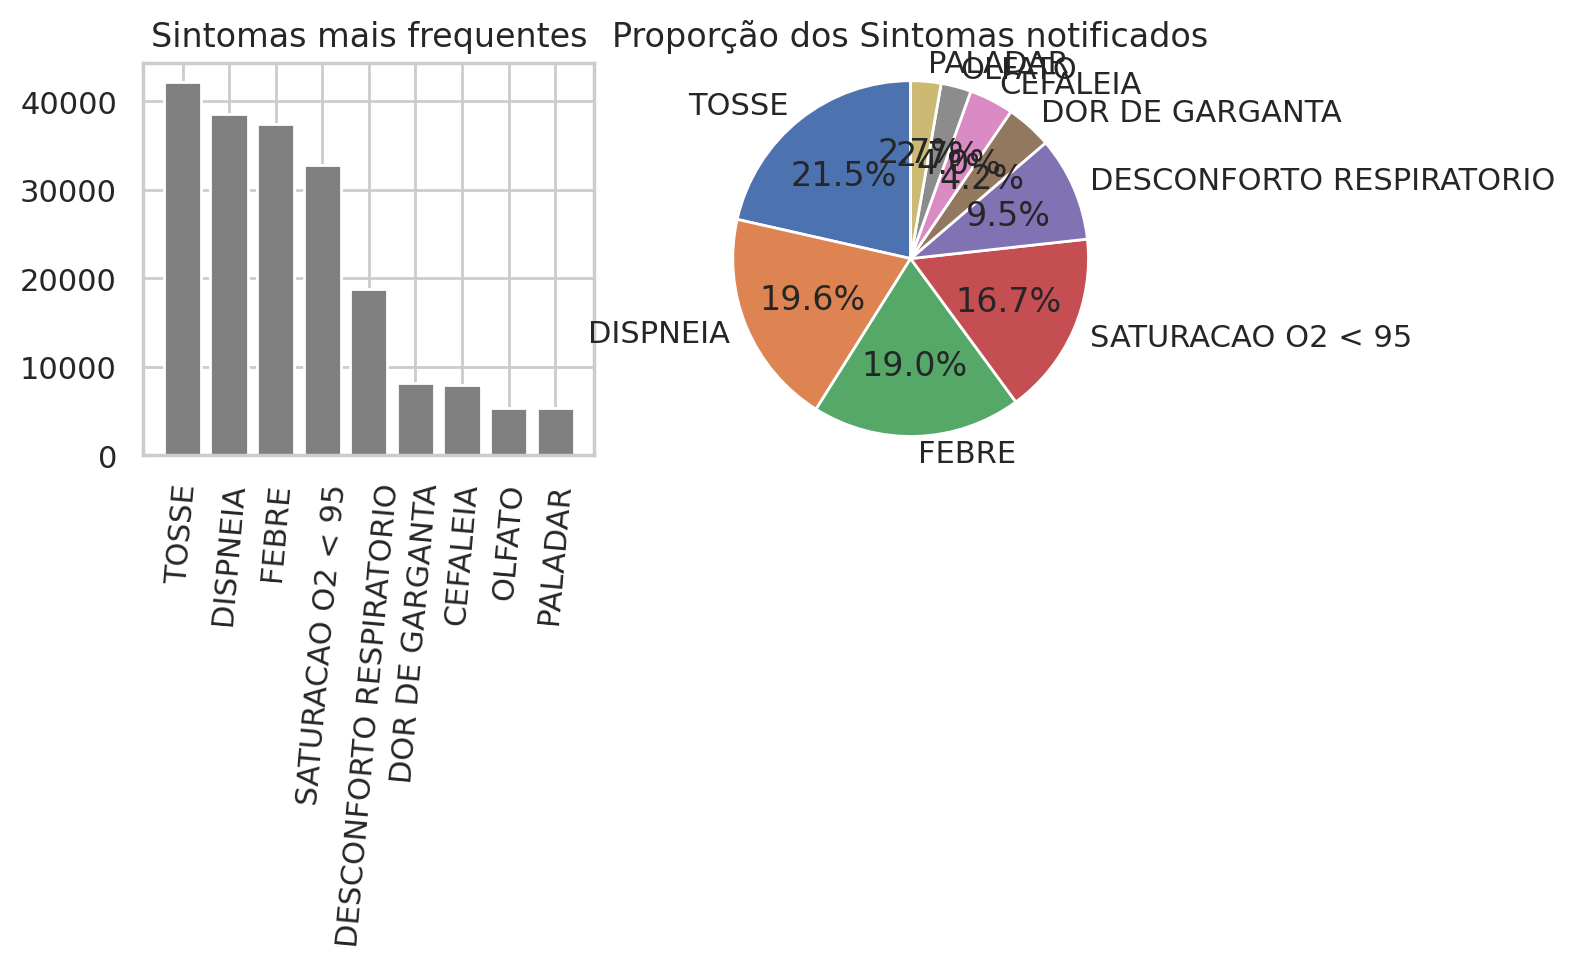

In [ ]:
#display(df.sintomas.unique())

#display(df.sintomas.value_counts())

#descobrir como fazer para não precisar listar os sintomas previamente

sintomas_dic = {}

sintomas_list = ['FEBRE', 'TOSSE', 'DISPNEIA', 'DOR DE GARGANTA', 'OLFATO', 'CEFALEIA', 'SATURACAO O2 < 95', 'DESCONFORTO RESPIRATORIO', 'PALADAR', \
                 'ASTENIA']

for x in sintomas_list:
  x_count=confirmados['sintomas'].str.contains(x).sum()
  if x_count>0:
    sintomas_dic.update({x: x_count})

sintomas_dic = dict(sorted(sintomas_dic.items(), key= lambda x: x[1], reverse=True))


print(sintomas_dic)

fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(6.4, 2.6))

ax[0].bar(sintomas_dic.keys(), sintomas_dic.values(), color='gray')

ax[1].pie(sintomas_dic.values(), labels = sintomas_dic.keys(), autopct='%1.1f%%',
        shadow=False, startangle=90)

ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax[0].set_title('Sintomas mais frequentes')

ax[1].set_title('Proporção dos Sintomas notificados')

ax[0].set_xticklabels(sintomas_dic.keys(), rotation = 85)

plt.show()


{'TOSSE': 20953, 'DISPNEIA': 20781, 'SATURACAO O2 < 95': 18641, 'FEBRE': 18536, 'DESCONFORTO RESPIRATORIO': 12030, 'CEFALEIA': 4354, 'DOR DE GARGANTA': 2998, 'PERDA DE OLFATO': 2906}


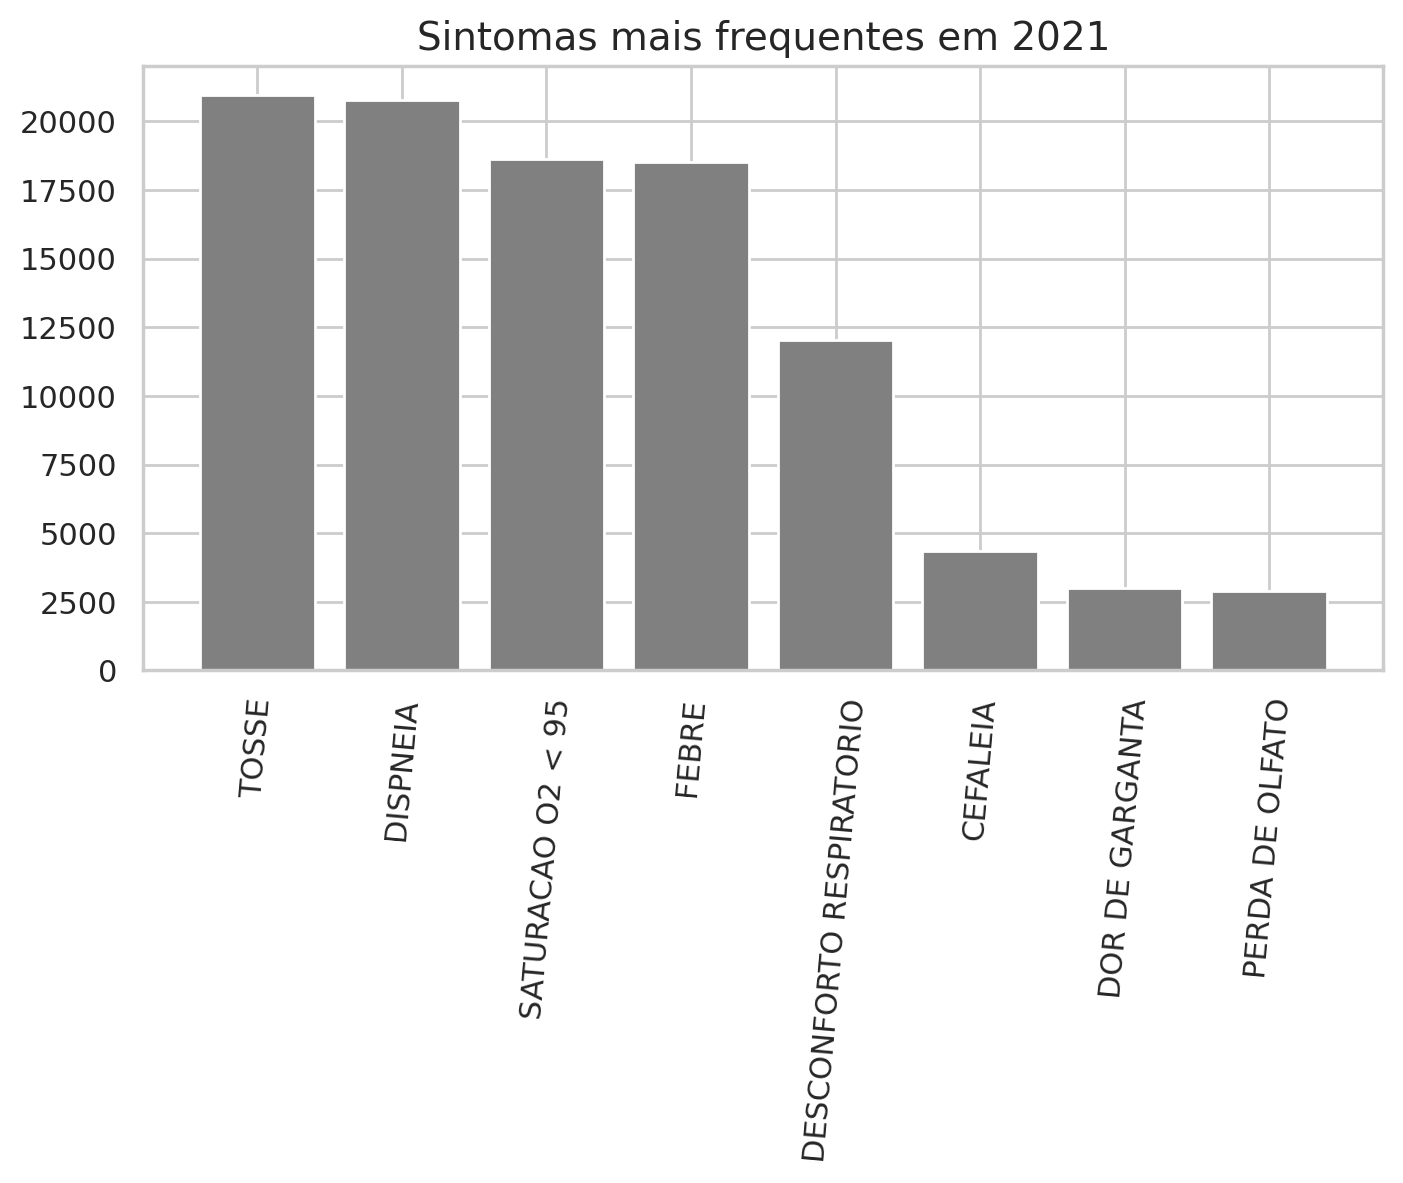

In [ ]:
casos_2021 = confirmados[confirmados['Ano'] == 2021]

sintomas_dic = {}

sintomas_list = ['FEBRE', 'TOSSE', 'DISPNEIA', 'DOR DE GARGANTA', 'PERDA DE OLFATO', 'CEFALEIA', 'SATURACAO O2 < 95', 'DESCONFORTO RESPIRATORIO', 'PERDA DE OLFATO E PALADAR', \
                 'ASTENIA']

for x in sintomas_list:
  x_count=casos_2021['sintomas'].str.contains(x).sum()
  if x_count>0:
    sintomas_dic.update({x: x_count})

sintomas_dic = dict(sorted(sintomas_dic.items(), key= lambda x: x[1], reverse=True))

print(sintomas_dic)

fig, ax = plt.subplots(figsize=(8,4))

ax.bar(sintomas_dic.keys(), sintomas_dic.values(), color='gray')

plt.title('Sintomas mais frequentes em 2021', size = 14)

plt.xticks(rotation= 85)

plt.show()



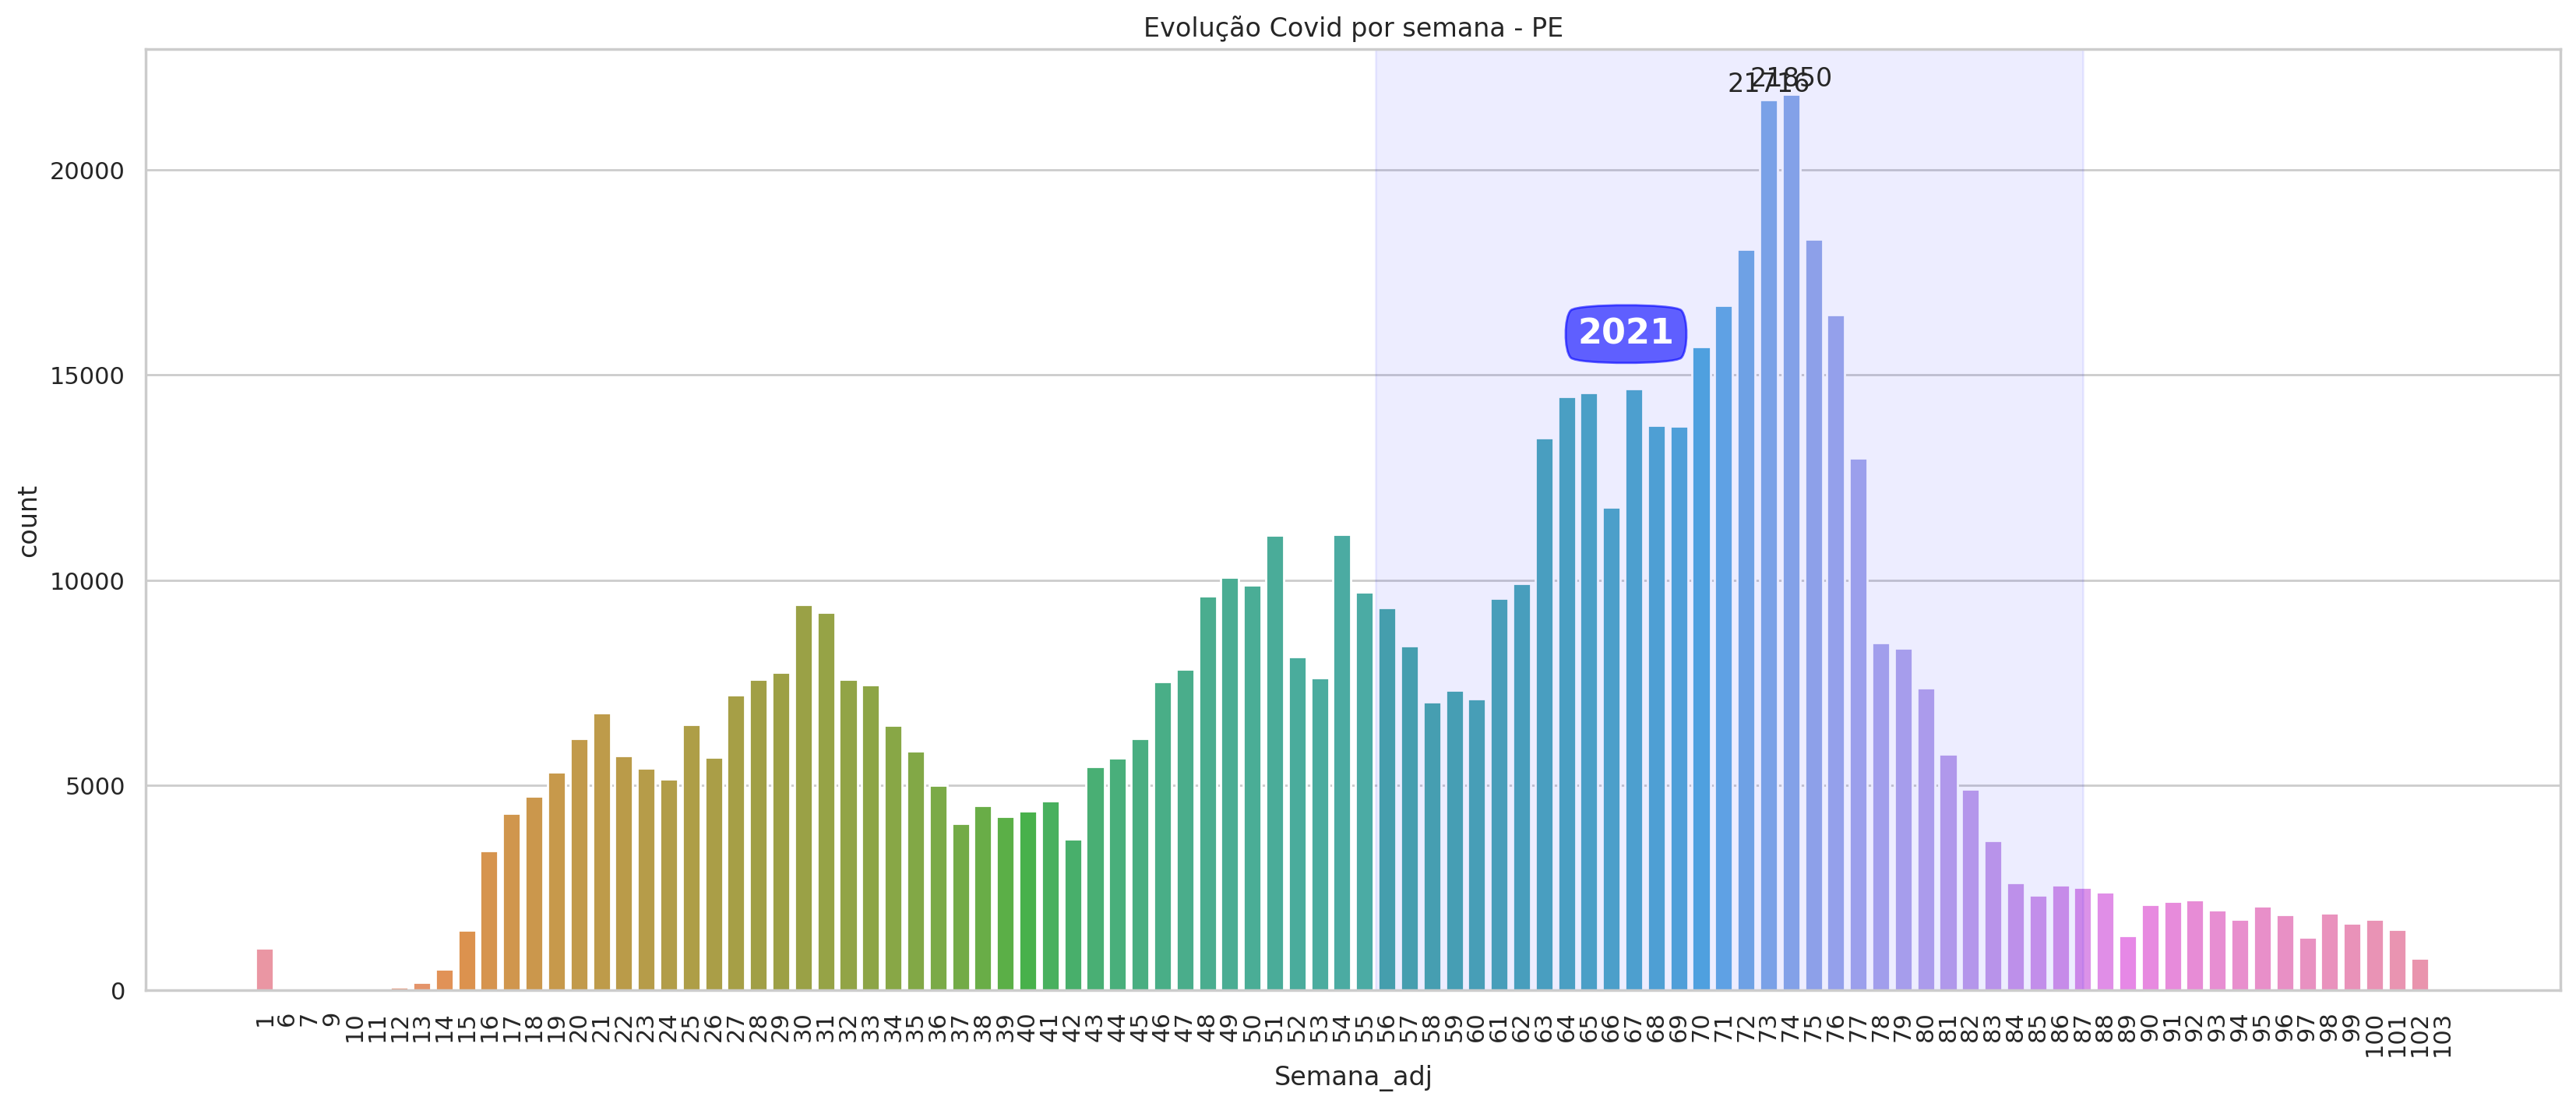

In [ ]:
fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (20,8)

plt.rcParams['figure.dpi'] = 200

sns.countplot(x = confirmados['Semana_adj'])

for p in ax.patches: #ax.patches -> iterar por todos os elementos de cada eixo, no caso, cada barra
    if p.get_height() > max(confirmados.groupby(['Semana_adj'])['classe'].count())*0.85:
      ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()-50), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')

ax.annotate('2021',
                    xy=(sum([49.5, 71.8])/2 ,16000),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color='blue', alpha=0.6))

ax.axvspan(49.5, 81,  color='blue', alpha=0.07)

ax.set_title('Evolução Covid por semana - PE')

plt.xticks(rotation = 90)

plt.show()


In [ ]:
#confirmados[(confirmados['Ano'] == 2021) & (confirmados['Semana'] == 1)] semana 1 -> 54

In [ ]:
hoje = (dt.datetime.today() - dt.timedelta(days=2))

ano_atual = hoje.year

mês_atual = hoje.month

dia_atual = hoje.day

hoje_delta2 = (hoje - dt.timedelta(days=14))

mês_delta2 = hoje_delta2.month

dia_delta2 = hoje_delta2.day

In [ ]:
print(hoje - dt.timedelta(days=14))

2021-12-04 17:06:09.939145


**Análise por dia (Confirmados)**

In [ ]:
def analise_diaria(frame, regiao, dt_inicio = '2021-01-01'):

  casos_df = frame[(frame['classe'] == 'EM INVESTIGACAO') | (frame['classe'] == 'CONFIRMADO')]

  casos_df = casos_df.sort_values(by = 'dt_notificacao')

  casos_df = casos_df.groupby('dt_notificacao')['dt_notificacao'].count()

  casos_df = pd.DataFrame(casos_df)

  casos_df = casos_df.rename(columns={"dt_notificacao" : "Freq"}).reset_index()

  casos_df['Media_movel_14'] = casos_df.iloc[:,1].rolling(window=14).mean()

  casos_df['Media_movel_7'] = casos_df.iloc[:,1].rolling(window=7).mean()

  casos_df = casos_df[casos_df['dt_notificacao'] >= dt_inicio]

  fig, ax = plt.subplots()

  plt.rcParams['figure.dpi'] = 200

  ax = plt.bar('dt_notificacao', 'Freq', data = casos_df, alpha = 0.7)

  ax = plt.plot('dt_notificacao', 'Media_movel_7', data = casos_df, color='red')

  ax = plt.plot('dt_notificacao', 'Media_movel_14', data = casos_df, color='m')

  plt.axvspan(dt.datetime(ano_atual,mês_delta2,dia_delta2), dt.datetime(ano_atual,mês_atual,dia_atual),  color='gray', alpha=0.3)

  ax = plt.xlabel('Período')

  ax = plt.ylabel('Quantidade de casos confirmados')

  ax = plt.legend()

  ax = plt.title(f'Evolução Covid-19 em {regiao} -a partir de {dt_inicio}')



  plt.show()

  


In [ ]:
#df['municipio'].unique()

RMR = ['RECIFE', 'CAMARAGIBE', 'PAULISTA','OLINDA','JABOATAO DOS GUARARAPES','GOIANA', 'SAO LOURENCO DA MATA', 'CABO DE SANTO AGOSTINHO'
       , 'ITAPISSUMA','ABREU E LIMA', 'IPOJUCA', 'MORENO', 'ILHA DE ITAMARACA', 'IGARASSU', 'ARACOIABA']

Agreste = ['GRAVATA', 'CARUARU', 'BEZERROS', 'SANTA CRUZ DO CAPIBARIBE', 'TRIUNFO', 'BELO JARDIM', 'CHA GRANDE', 'ESCADA', 'VITORIA DE SANTO ANTAO',
          'POMBOS', 'SAIRE']

analise_RMR = df[df['municipio'].isin(RMR)]

look_Agresge = df[df['municipio'].isin(Agreste)]


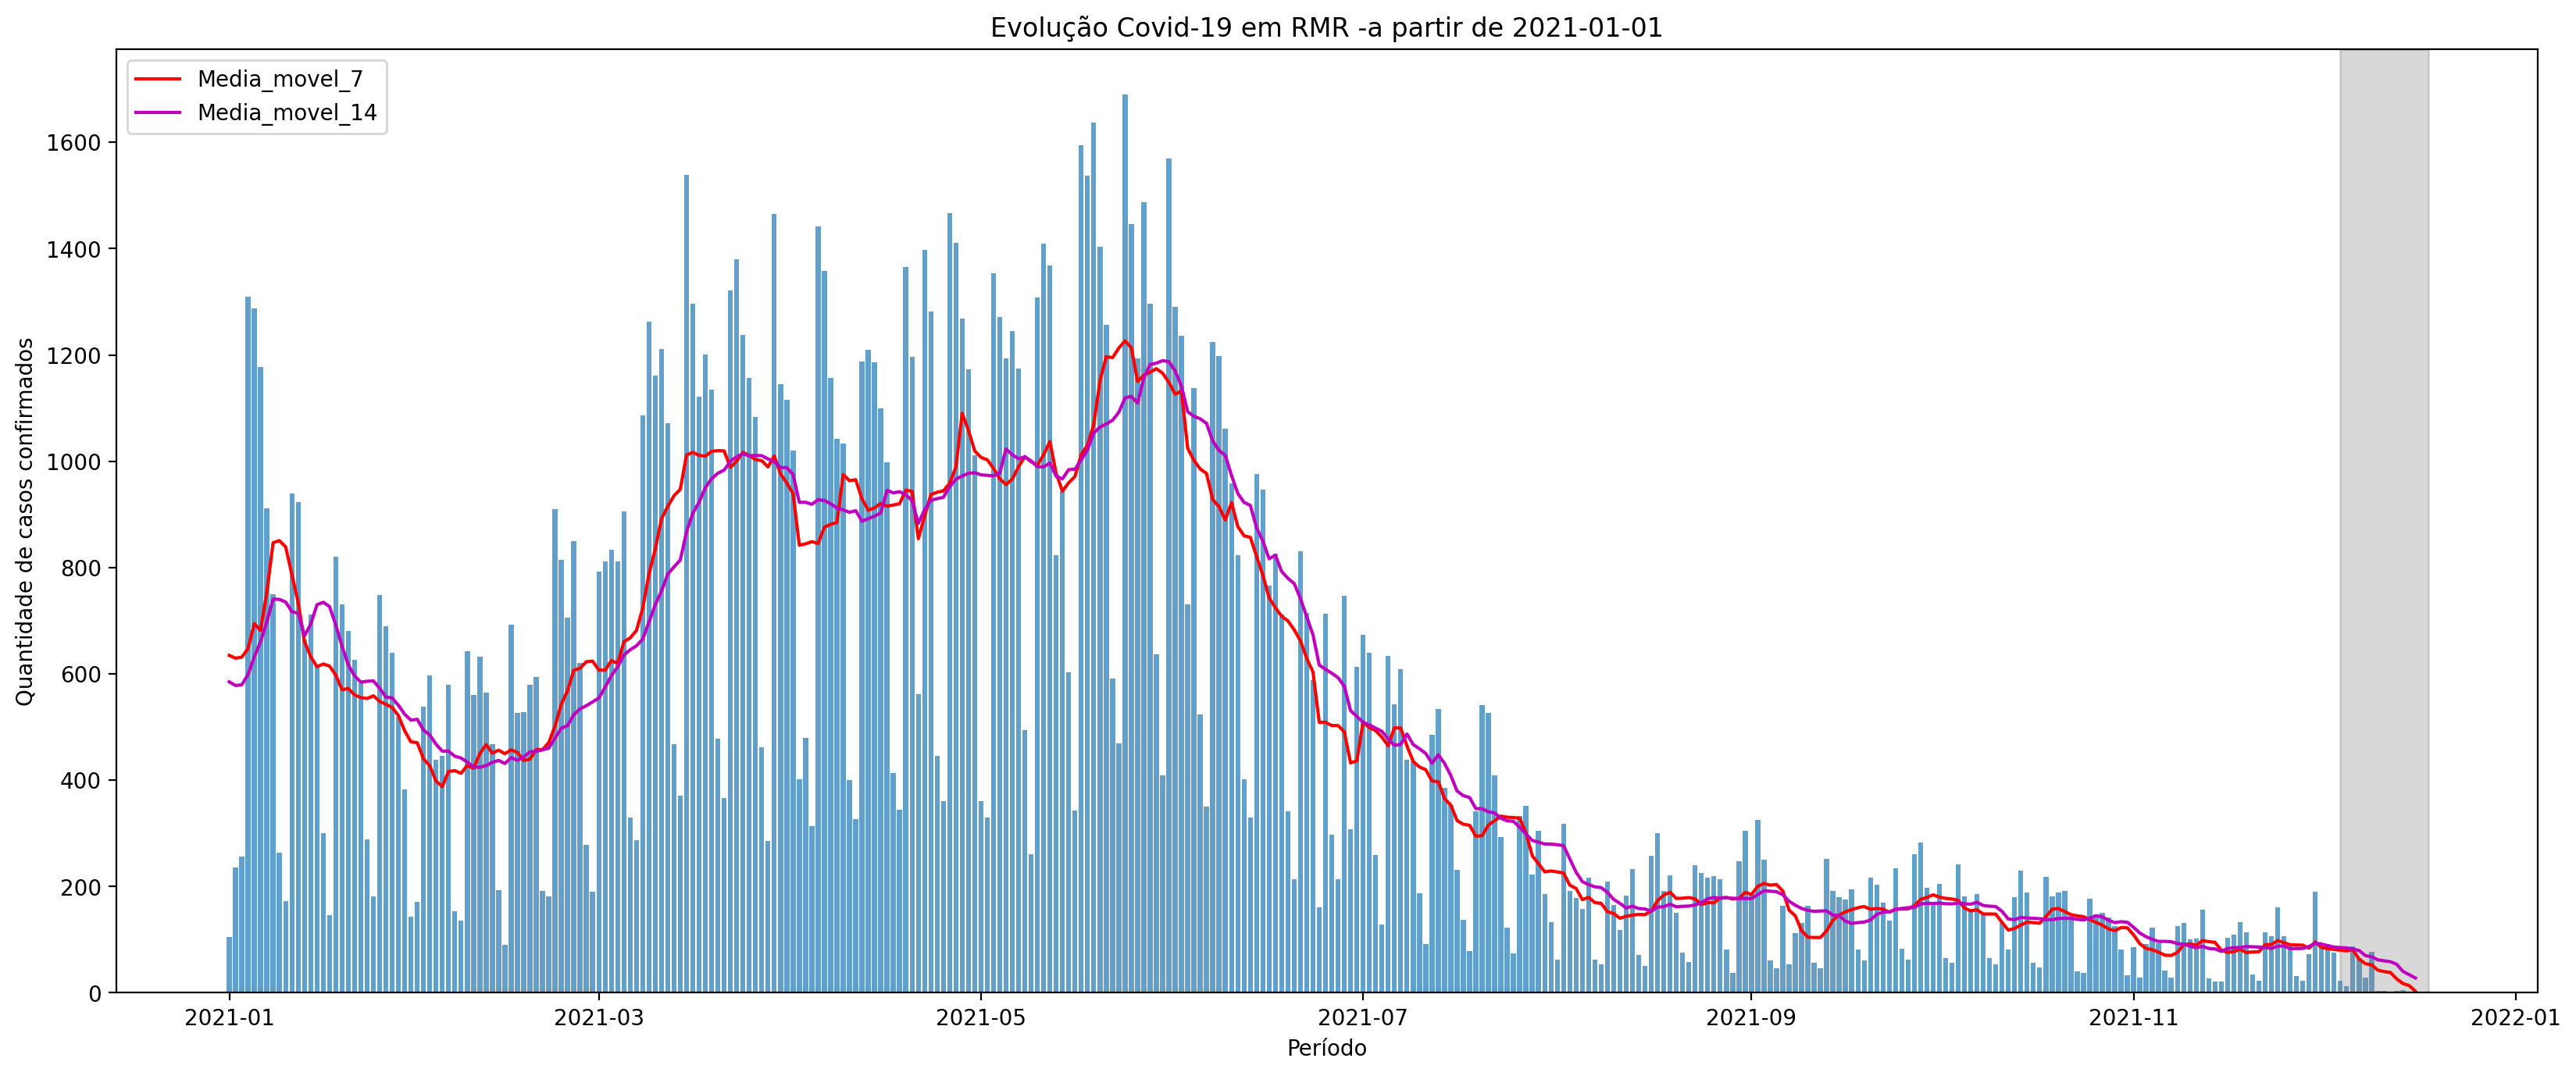

In [ ]:
analise_diaria(analise_RMR, 'RMR')

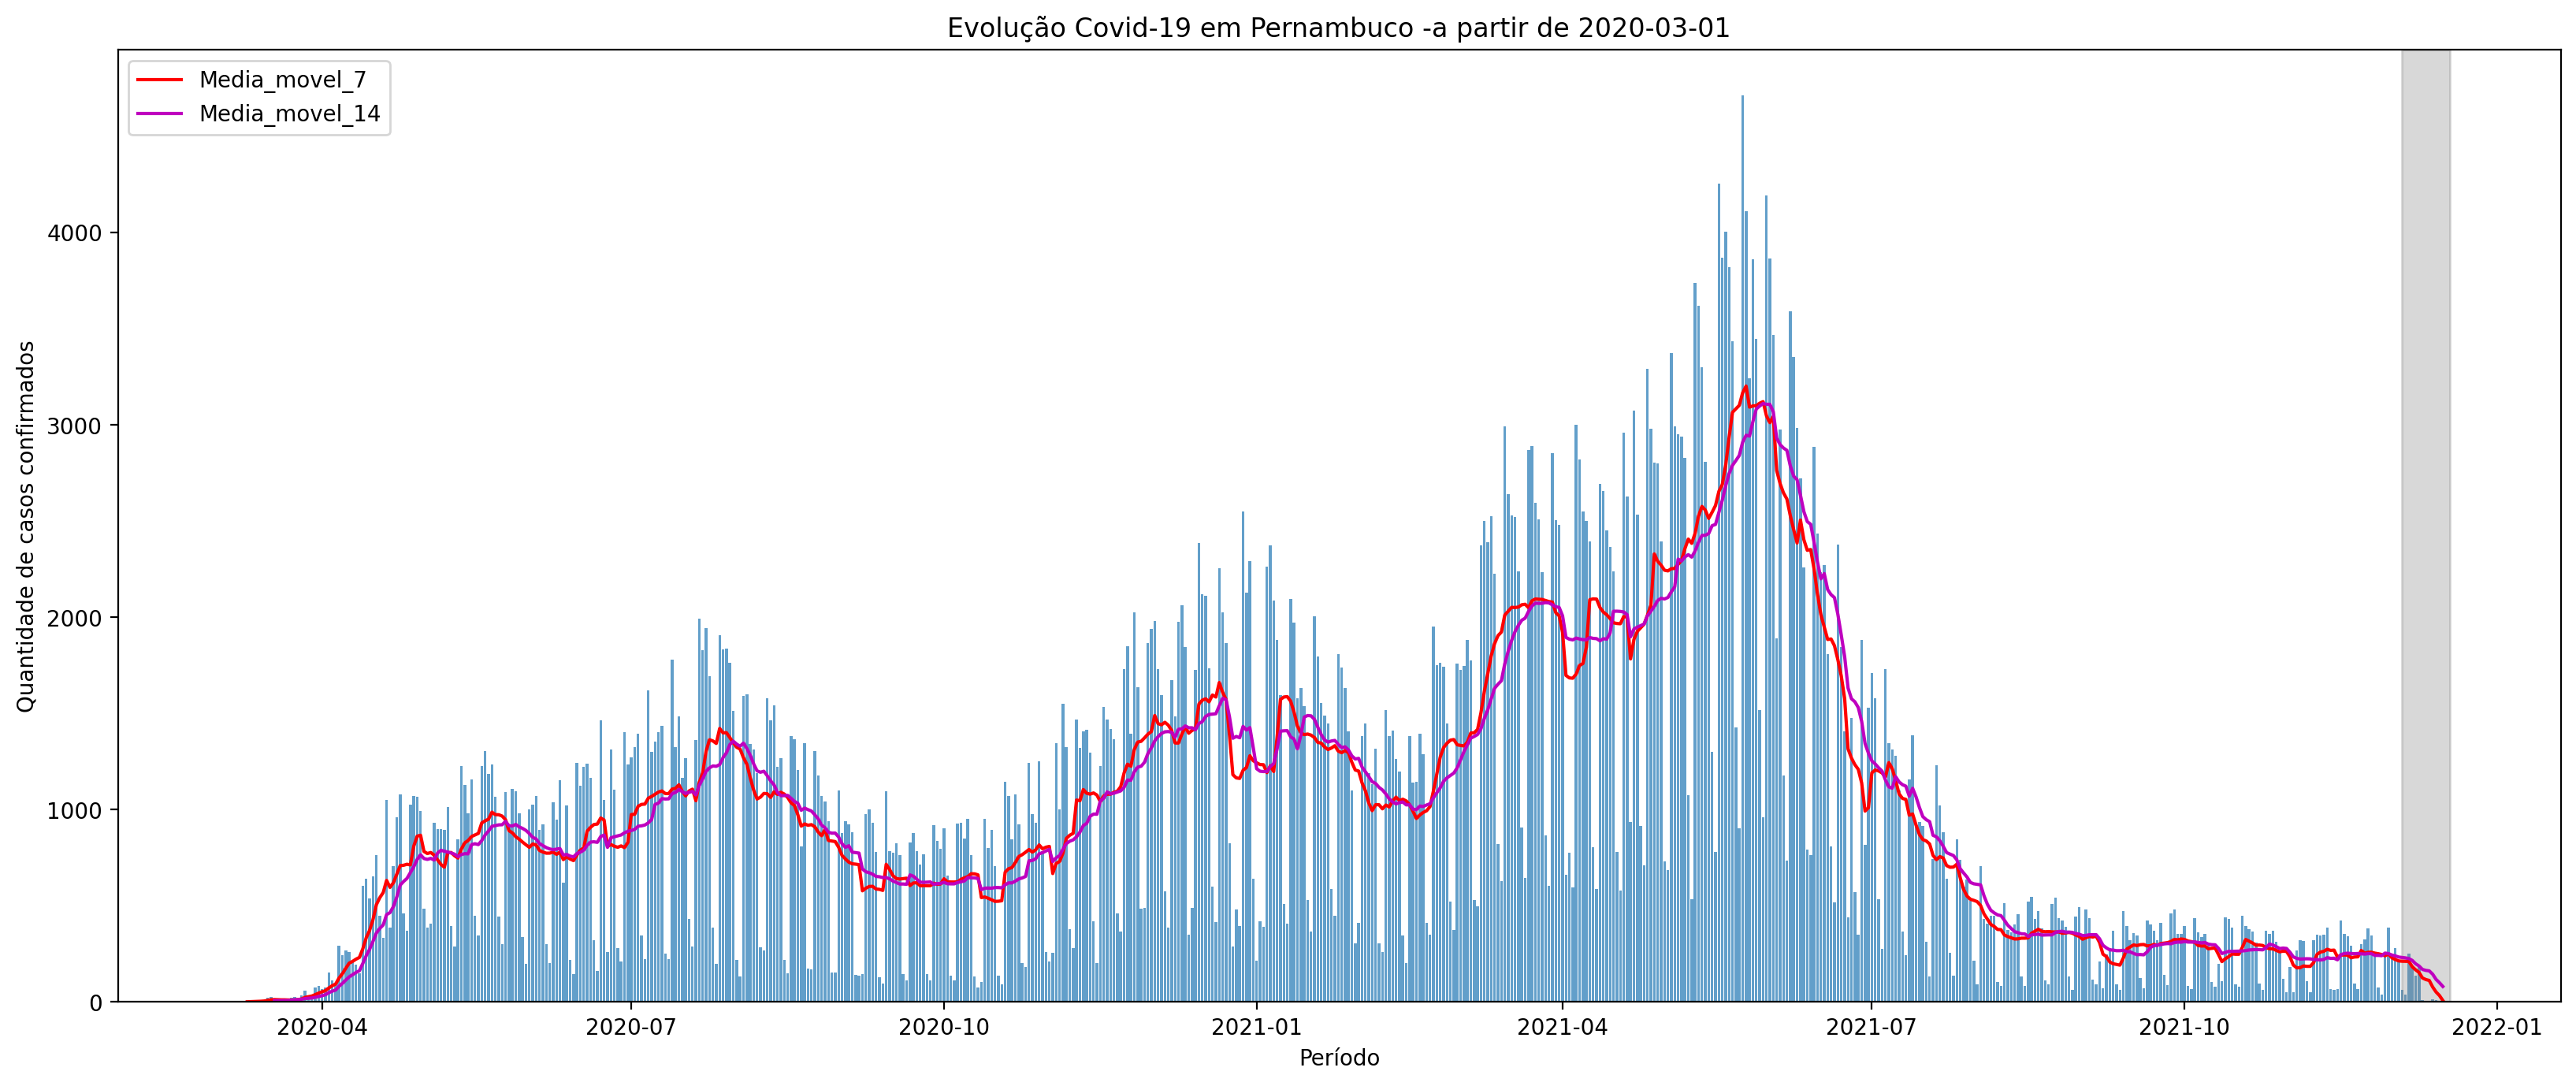

In [ ]:
analise_diaria(df, 'Pernambuco', dt_inicio='2020-03-01')

Análise de Óbitos

In [ ]:
df.dt_notificacao.isna().sum()

df['dt_obito'] = df['dt_obito'].fillna(0)

df['obito'] = [0 if x == 0 else 1 for x in df['dt_obito']]

df['obito'].value_counts()

0    2131216
1      29095
Name: obito, dtype: int64

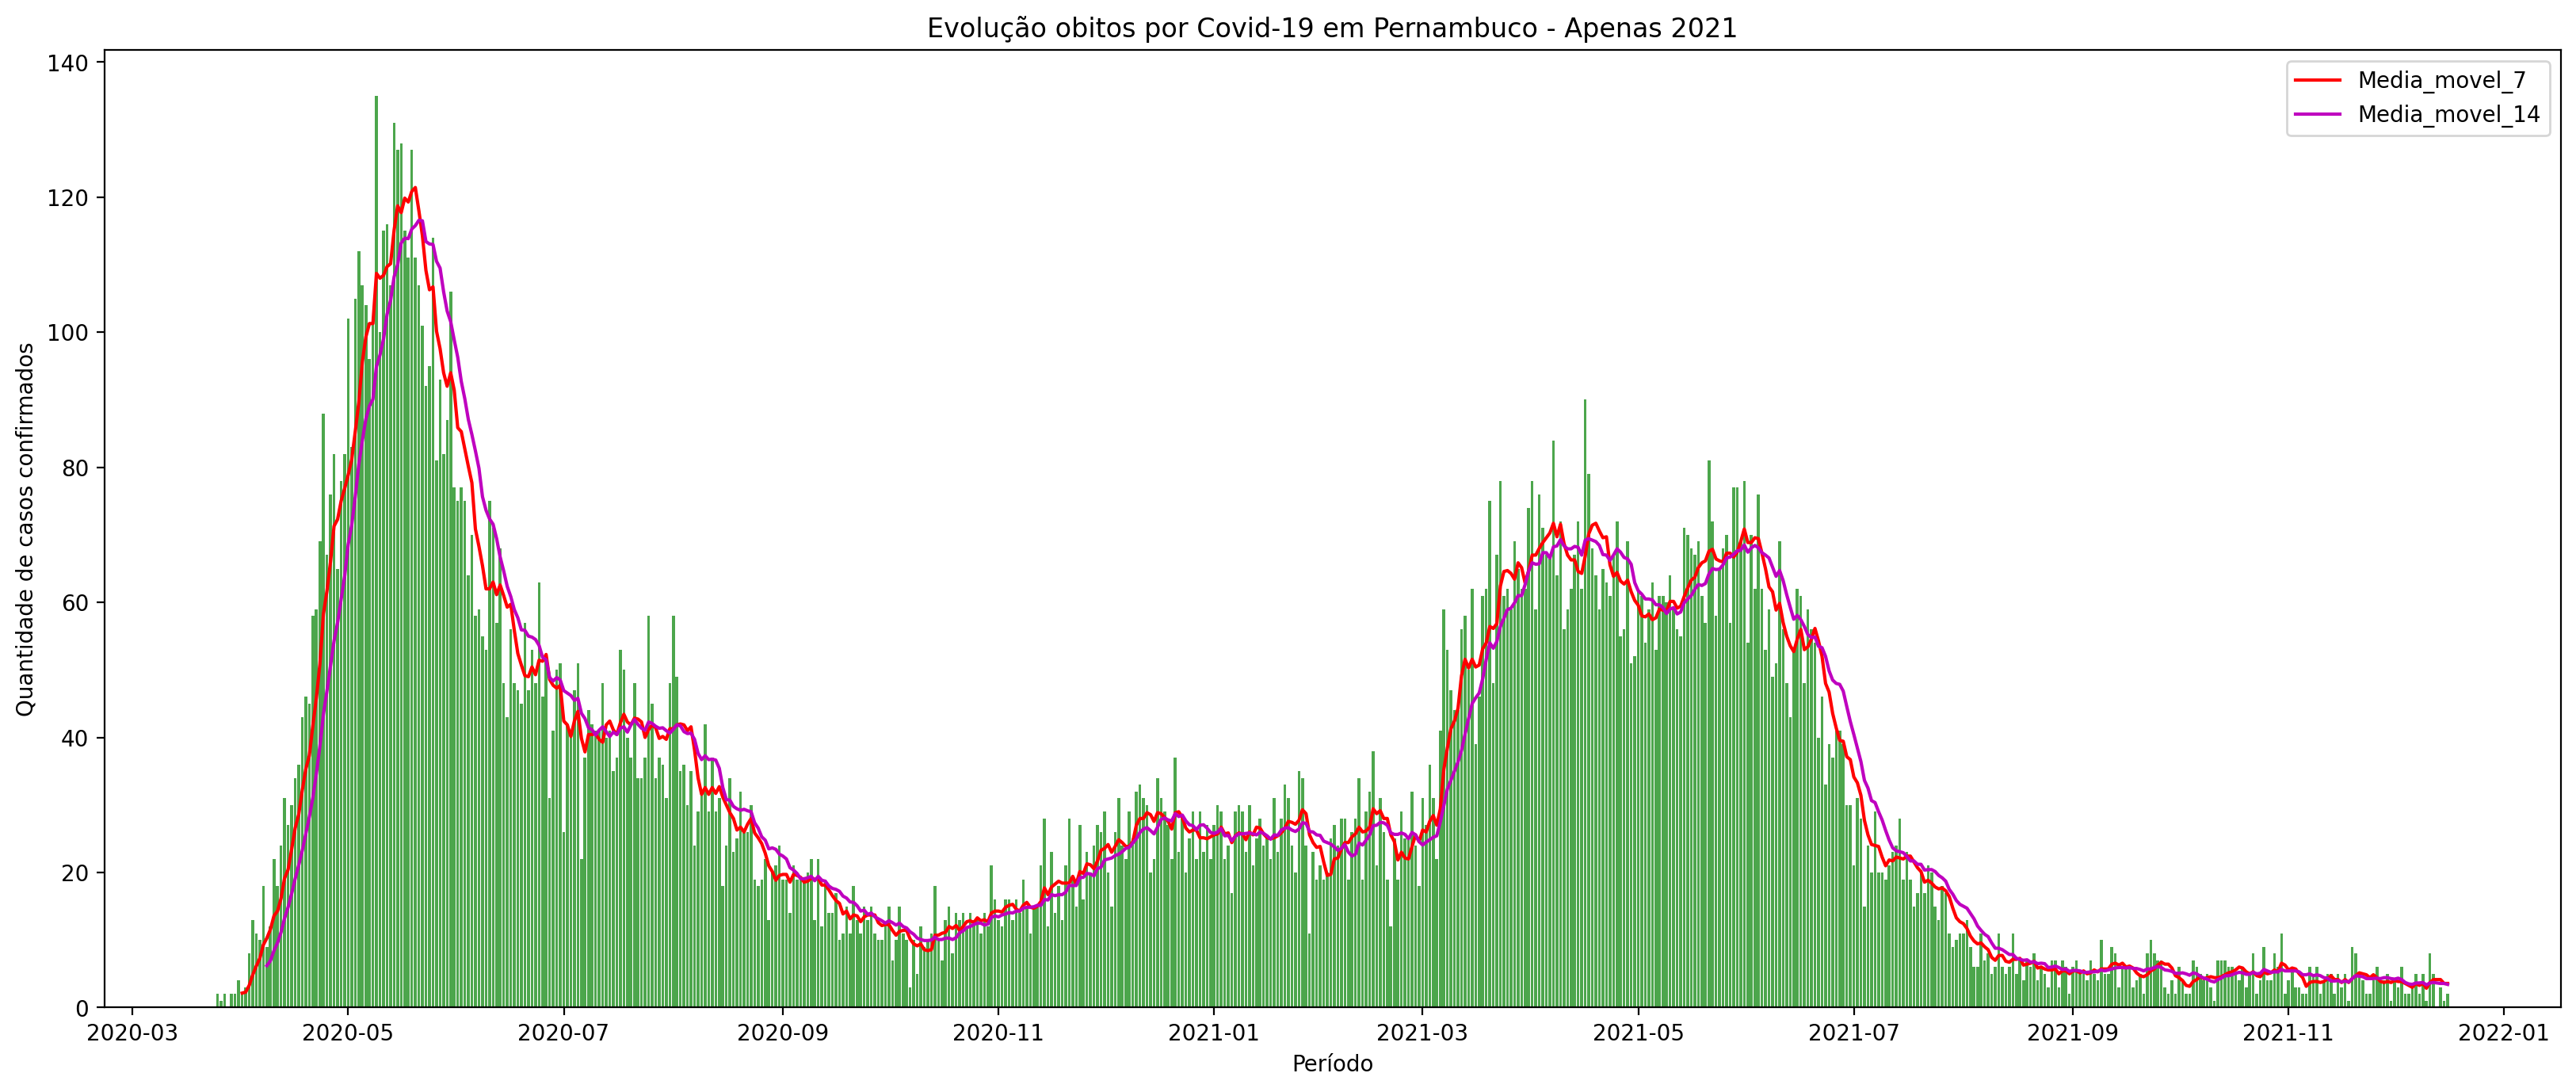

In [ ]:
obitos = df[(df['obito'] == 1) & (df['classe'] != 'DESCARTADO') ]

obitos = obitos.sort_values(by = 'dt_obito')

graph_obitos = obitos.groupby('dt_obito')['dt_obito'].count()

graph_obitos = pd.DataFrame(graph_obitos)

graph_obitos = graph_obitos.rename(columns={"dt_obito" : "Freq"}).reset_index()

graph_obitos['Media_movel_14'] = graph_obitos.iloc[:,1].rolling(window=14).mean()

graph_obitos['Media_movel_7'] = graph_obitos.iloc[:,1].rolling(window=7).mean()

graph_obitos = graph_obitos[graph_obitos['dt_obito'] >= '2020-01-01']

fig, ax = plt.subplots()

plt.rcParams['figure.dpi'] = 200

ax = plt.bar('dt_obito', 'Freq', data = graph_obitos, alpha = 0.7, color = 'green')

ax = plt.plot('dt_obito', 'Media_movel_7', data = graph_obitos, color='red')

ax = plt.plot('dt_obito', 'Media_movel_14', data = graph_obitos, color='m')

ax = plt.xlabel('Período')

ax = plt.ylabel('Quantidade de casos confirmados')

ax = plt.legend()

ax = plt.title('Evolução obitos por Covid-19 em Pernambuco - Apenas 2021')

plt.show()

Análise dos óbitos

In [ ]:
obitos.faixa_etaria.replace(['0-9 anos','10-19 anos','20-29 anos','30-39 anos', '40-49 anos'], '0-50 anos', inplace=True)

#fx = obitos[obitos['Semana_adj'] <= max(obitos['Semana_adj'] - 1)]

fx = obitos.groupby(['faixa_etaria', 'dt_obito']).agg(count_dt = ('dt_obito','count')).reset_index()

#unic_fx = fx.faixa_etaria.unique()

unic_fx = ['0-50 anos','50-59 anos' , '60-69 anos', '70-79 anos', '80+ anos']

fx['Media_movel_14'] = fx.iloc[:,2].rolling(window=14).mean()

colors = ['c', 'yellow', 'tomato', 'grey','blue']

#display(fx.head())


#colors = ['yellow', 'blue', 'darksalmon']



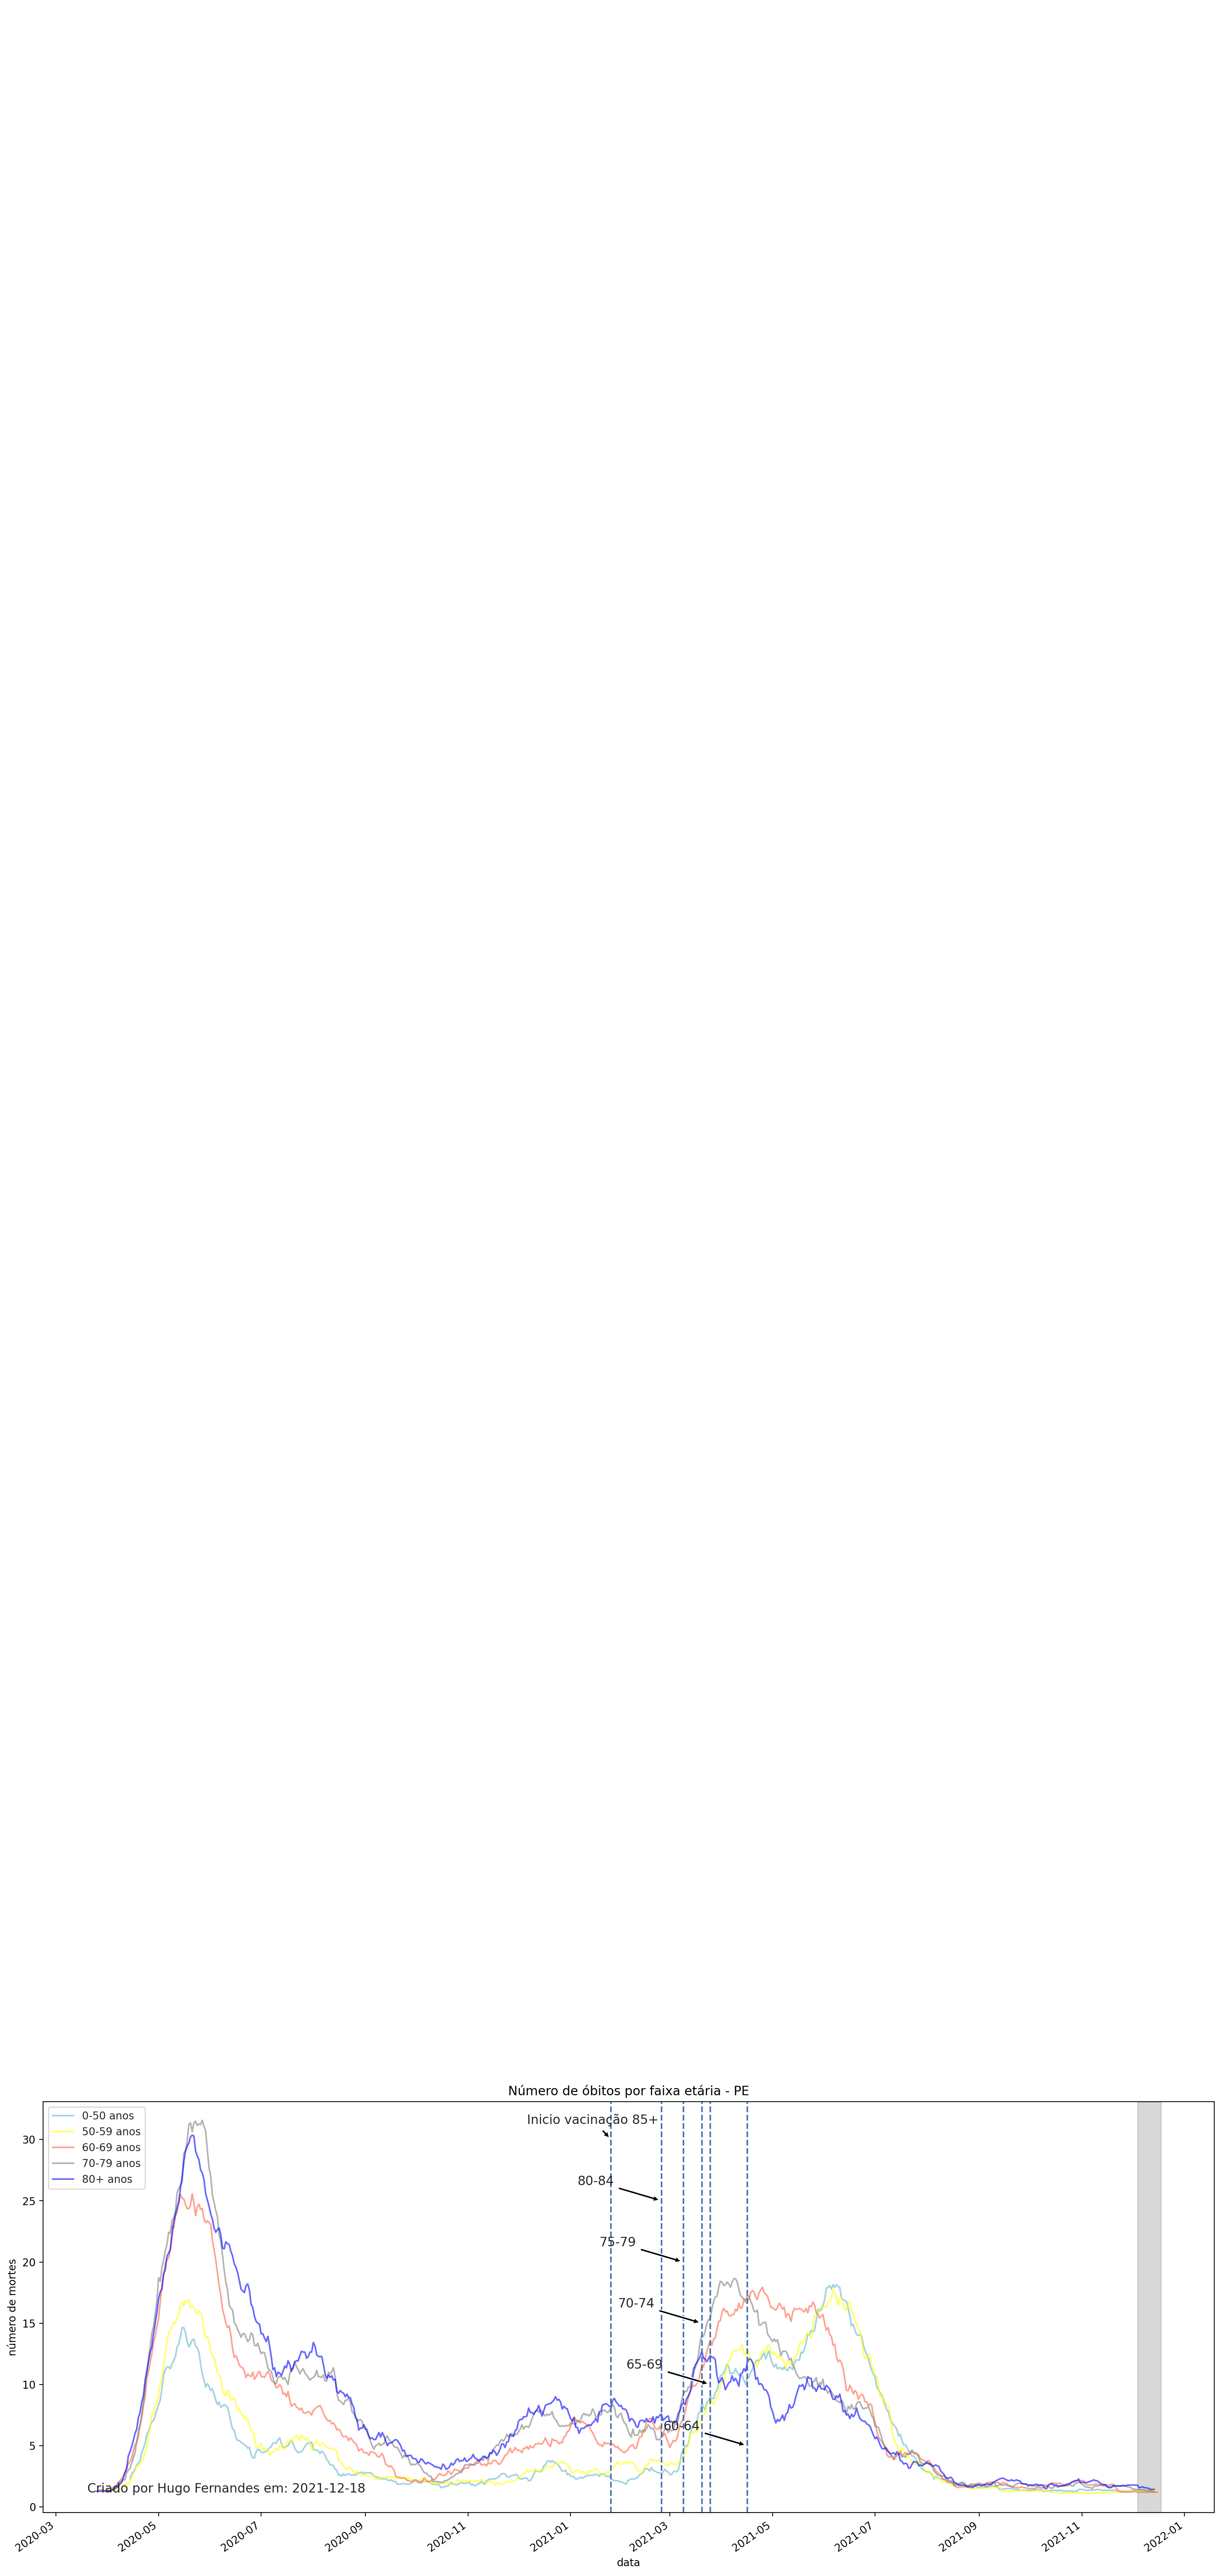

In [ ]:
fig, ax = plt.subplots()
 
sns.set_theme(style='whitegrid')
 
for i in range(5):
  plt.plot(fx[fx['faixa_etaria']== unic_fx[i]]['dt_obito'], fx[fx['faixa_etaria']== unic_fx[i]]['Media_movel_14'], color = colors[i], alpha = 0.6, label =  unic_fx[i])
 
ax.axvspan(dt.datetime(ano_atual,mês_delta2,dia_delta2), dt.datetime(ano_atual,mês_atual,dia_atual),  color='gray', alpha=0.3)
 
ax.annotate('Dados parciais', (mdates.date2num(dt.datetime(ano_atual,mês_delta2,dia_delta2)),202), xytext=(-8, 15), 
            textcoords='offset points', arrowprops=dict(arrowstyle='simple', facecolor='black'))
 
ax.axvline(x=dt.datetime(2021,1,25), linestyle='dashed')
 
ax.annotate('Inicio vacinação 85+', (mdates.date2num(dt.datetime(2021,1,25)),30), xytext=(-80, 15), 
            textcoords='offset points' , arrowprops=dict(arrowstyle='simple', facecolor='black'))
 
ax.axvline(x=dt.datetime(2021,2,24), linestyle='dashed')
 
ax.annotate('80-84', (mdates.date2num(dt.datetime(2021,2,24)),25), xytext=(-80, 15), 
            textcoords='offset points', arrowprops=dict(arrowstyle='simple', facecolor='black'))
 
ax.axvline(x=dt.datetime(2021,3,9), linestyle='dashed')
 
ax.annotate('75-79', (mdates.date2num(dt.datetime(2021,3,9)),20), xytext=(-80, 15), 
            textcoords='offset points', arrowprops=dict(arrowstyle='simple', facecolor='black'))
 
ax.axvline(x=dt.datetime(2021,3,20), linestyle='dashed')
 
ax.annotate('70-74', (mdates.date2num(dt.datetime(2021,3,20)),15), xytext=(-80, 15), 
            textcoords='offset points', arrowprops=dict(arrowstyle='simple', facecolor='black'))
 
ax.axvline(x=dt.datetime(2021,3,25), linestyle='dashed')
 
ax.annotate('65-69', (mdates.date2num(dt.datetime(2021,3,25)),10), xytext=(-80, 15), 
            textcoords='offset points', arrowprops=dict(arrowstyle='simple', facecolor='black'))
 
ax.axvline(x=dt.datetime(2021,4,16), linestyle='dashed')
 
ax.annotate('60-64', (mdates.date2num(dt.datetime(2021,4,16)),5), xytext=(-80, 15), 
            textcoords='offset points', arrowprops=dict(arrowstyle='simple', facecolor='black'))
 
ax.annotate(f'Criado por Hugo Fernandes em: {hoje.date()}', (mdates.date2num(dt.datetime(2020,4,1)),1), xytext=(-20, 2), 
            textcoords='offset points')
 
fig.autofmt_xdate()
 
#ax.axvspan(datetime(2021,6,7), datetime(2021,6,21),  color='gray', alpha=0.3)
 
plt.legend(fontsize=10)
 
plt.ylabel('número de mortes')
 
plt.xlabel('data')
 
plt.xticks(rotation=35)
 
plt.title('Número de óbitos por faixa etária - PE')
 
plt.savefig('ovitos_pe.png', dpi=150)
 
 
plt.show()

In [ ]:
fx.faixa_etaria.value_counts()

80+ anos      590
70-79 anos    583
60-69 anos    573
50-59 anos    532
0-50 anos     520
Name: faixa_etaria, dtype: int64

In [ ]:
fx[fx['faixa_etaria'] == '80+ anos']

,faixa_etaria,dt_obito,count_dt,Media_movel_14
2208,80+ anos,2020-03-25,2,1.285714
2209,80+ anos,2020-03-31,1,1.285714
2210,80+ anos,2020-04-01,2,1.357143
2211,80+ anos,2020-04-02,1,1.285714
2212,80+ anos,2020-04-03,3,1.357143
...,...,...,...,...
2793,80+ anos,2021-12-08,1,1.571429
2794,80+ anos,2021-12-09,1,1.571429
2795,80+ anos,2021-12-11,2,1.500000
2796,80+ anos,2021-12-12,1,1.428571


In [ ]:
tst = obitos[obitos['Semana_adj'] <= max(obitos['Semana_adj'] - 1)]

max(tst['Semana_adj'])

102

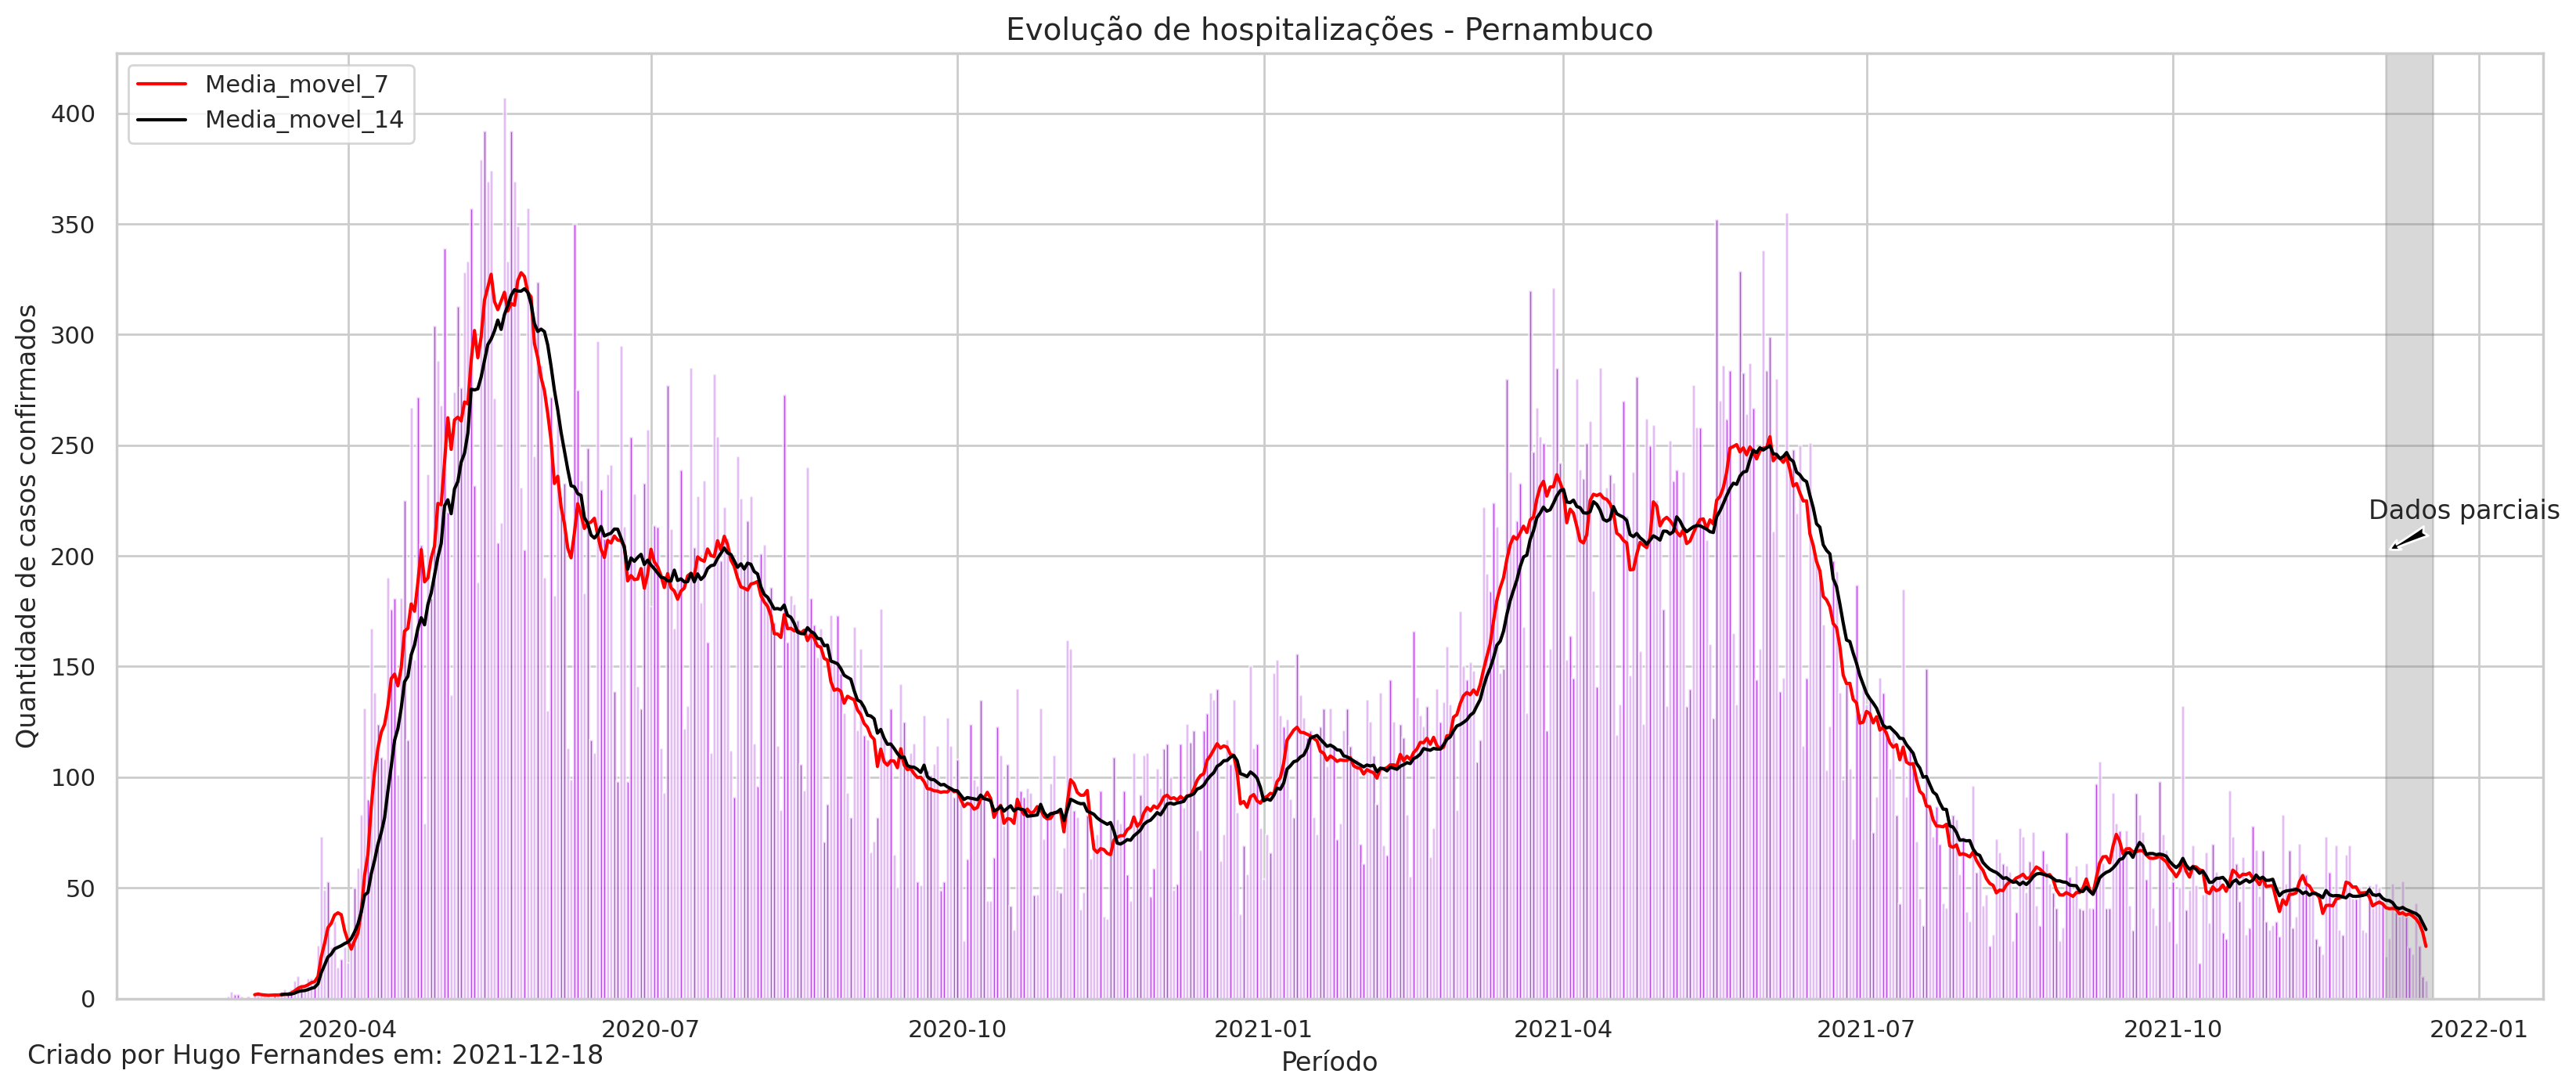

In [ ]:
hospitalizados = df[df.hospitalizacao == 'SIM']

hospitalizados = hospitalizados.sort_values(by = 'dt_notificacao')

hospitalizados = hospitalizados.groupby('dt_notificacao')['dt_notificacao'].count()

hospitalizados = pd.DataFrame(hospitalizados)

hospitalizados = hospitalizados.rename(columns={"dt_notificacao" : "Freq"}).reset_index()

hospitalizados['Media_movel_14'] = hospitalizados.iloc[:,1].rolling(window=14).mean()

hospitalizados['Media_movel_7'] = hospitalizados.iloc[:,1].rolling(window=7).mean()

fig, ax = plt.subplots()

ax.bar('dt_notificacao', 'Freq', data = hospitalizados, alpha = 0.7, color = 'darkviolet')

ax.plot('dt_notificacao', 'Media_movel_7', data = hospitalizados, color='red')

ax.plot('dt_notificacao', 'Media_movel_14', data = hospitalizados, color='black')

ax.axvspan(dt.datetime(ano_atual,mês_delta2,dia_delta2), dt.datetime(ano_atual,mês_atual,dia_atual),  color='gray', alpha=0.3)

ax.annotate('Dados parciais', (mdates.date2num(dt.datetime(ano_atual,mês_delta2,dia_delta2)),202), xytext=(-8, 15), 
            textcoords='offset points', arrowprops=dict(arrowstyle='fancy', facecolor='black'))

ax.annotate(f'Criado por Hugo Fernandes em: {hoje.date()}', (mdates.date2num(dt.datetime(2020,3,1)),0), xytext=(-100, -30), 
            textcoords='offset points')


plt.xlabel('Período')

plt.ylabel('Quantidade de casos confirmados')

plt.legend()

plt.title('Evolução de hospitalizações - Pernambuco', size = 14)

plt.show()

In [ ]:
dt.datetime.today().year

2021

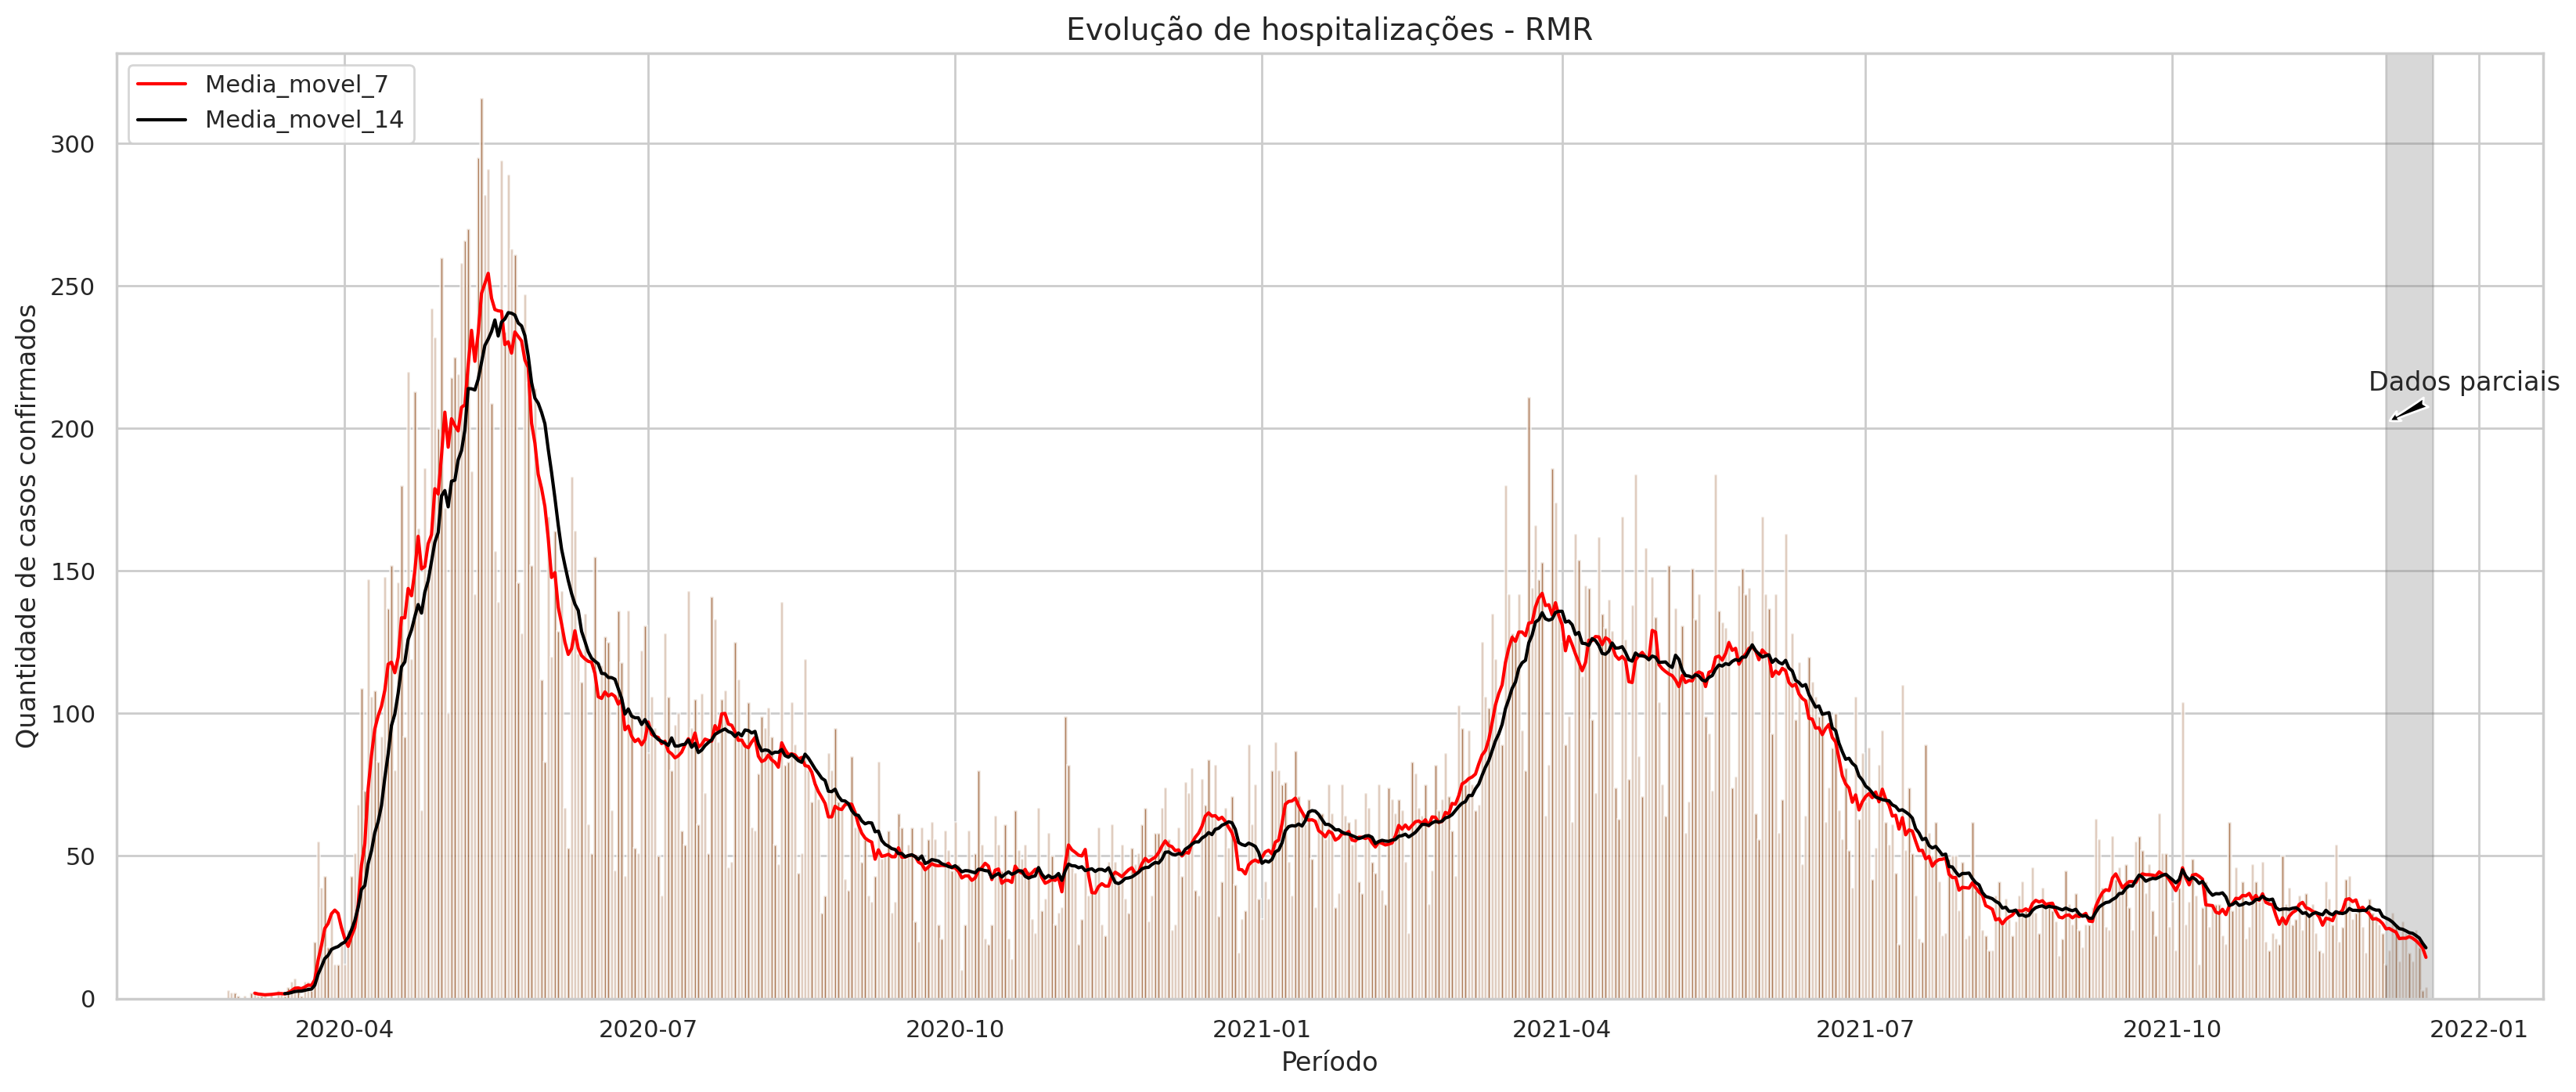

In [ ]:
hosp_rmr = analise_RMR[analise_RMR.hospitalizacao == 'SIM']

hosp_rmr = hosp_rmr.sort_values(by = 'dt_notificacao')

hosp_rmr = hosp_rmr.groupby('dt_notificacao')['dt_notificacao'].count()

hosp_rmr = pd.DataFrame(hosp_rmr)

hosp_rmr = hosp_rmr.rename(columns={"dt_notificacao" : "Freq"}).reset_index()

hosp_rmr['Media_movel_14'] = hosp_rmr.iloc[:,1].rolling(window=14).mean()

hosp_rmr['Media_movel_7'] = hosp_rmr.iloc[:,1].rolling(window=7).mean()

fig, ax = plt.subplots()

ax = plt.bar('dt_notificacao', 'Freq', data = hosp_rmr, alpha = 0.7, color = 'saddlebrown')


ax = plt.plot('dt_notificacao', 'Media_movel_7', data = hosp_rmr, color='red')

ax = plt.plot('dt_notificacao', 'Media_movel_14', data = hosp_rmr, color='black')

plt.annotate('Dados parciais', (mdates.date2num(dt.datetime(ano_atual,mês_delta2,dia_delta2)),202), xytext=(-8, 15), 
            textcoords='offset points', arrowprops=dict(arrowstyle='fancy', facecolor='black'))

plt.axvspan(dt.datetime(ano_atual,mês_delta2,dia_delta2), dt.datetime(ano_atual,mês_atual,dia_atual),  color='gray', alpha=0.3)

ax = plt.xlabel('Período')

ax = plt.ylabel('Quantidade de casos confirmados')

ax = plt.legend()

ax = plt.title('Evolução de hospitalizações - RMR', size = 14)

plt.show()

In [ ]:
hosp_rmr.tail(10)

,dt_notificacao,Freq,Media_movel_14,Media_movel_7
646,2021-12-07,26,25.571429,23.285714
647,2021-12-08,13,24.500000,21.000000
648,2021-12-09,27,24.285714,21.142857
649,2021-12-10,23,23.714286,21.142857
650,2021-12-11,16,23.071429,21.714286
651,2021-12-12,13,22.857143,21.142857
652,2021-12-13,24,22.071429,20.285714
653,2021-12-14,18,21.214286,19.142857
654,2021-12-15,3,19.357143,17.714286
655,2021-12-16,4,17.785714,14.428571


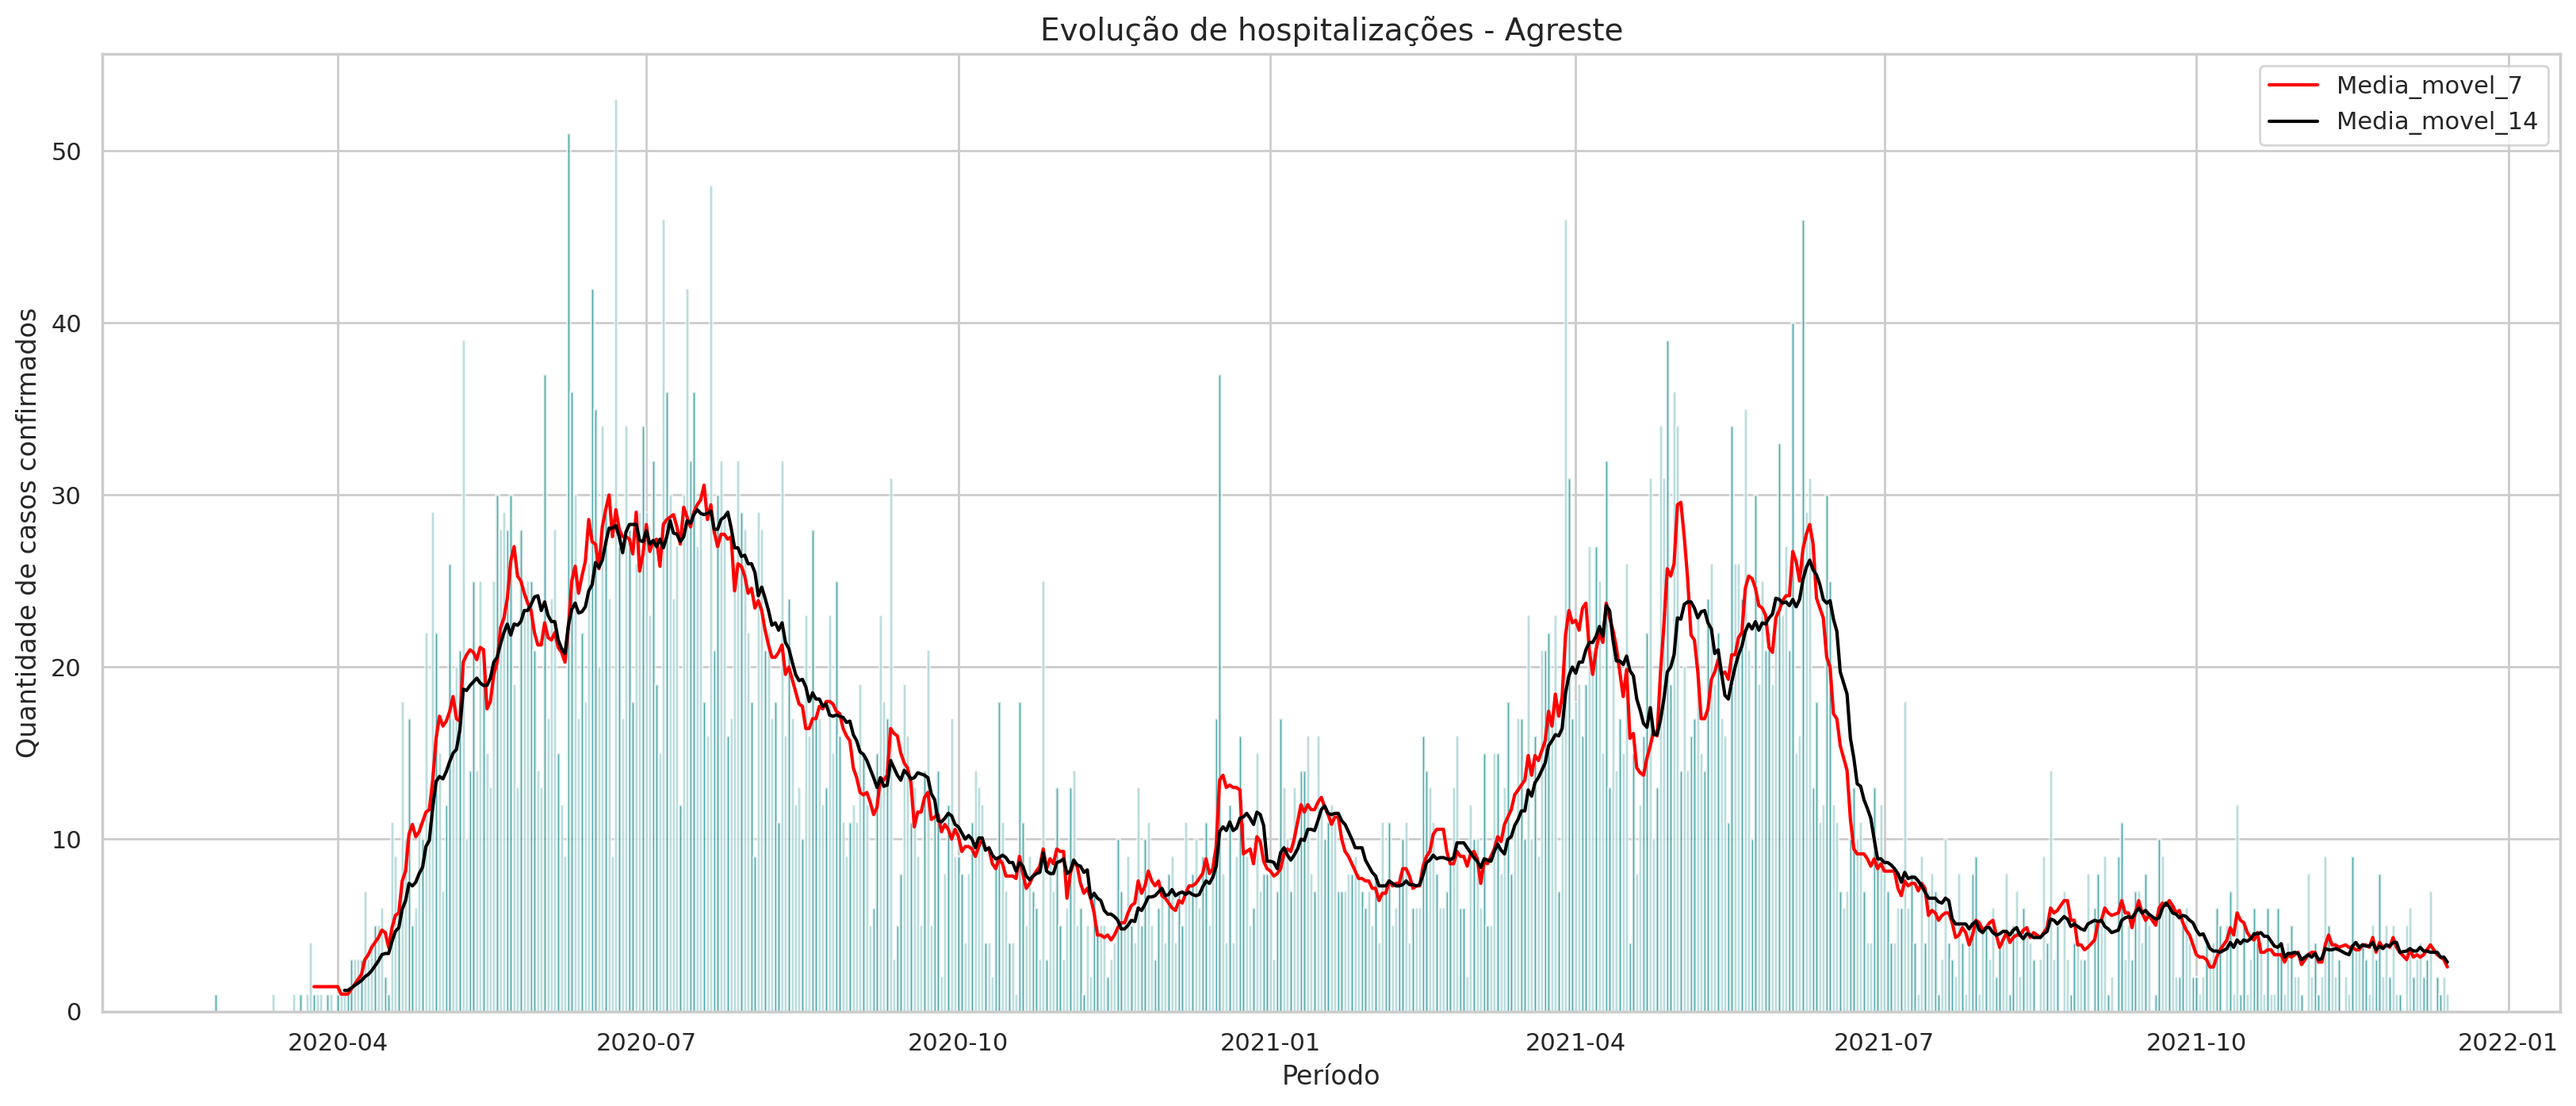

In [ ]:
hosp_agreste = look_Agresge[look_Agresge.hospitalizacao == 'SIM']

hosp_agreste = hosp_agreste.sort_values(by = 'dt_notificacao')

hosp_agreste = hosp_agreste.groupby('dt_notificacao')['dt_notificacao'].count()

hosp_agreste = pd.DataFrame(hosp_agreste)

hosp_agreste = hosp_agreste.rename(columns={"dt_notificacao" : "Freq"}).reset_index()

hosp_agreste['Media_movel_14'] = hosp_agreste.iloc[:,1].rolling(window=14).mean()

hosp_agreste['Media_movel_7'] = hosp_agreste.iloc[:,1].rolling(window=7).mean()

fig, ax = plt.subplots()

ax = plt.bar('dt_notificacao', 'Freq', data = hosp_agreste, alpha = 0.7, color = 'teal')

ax = plt.plot('dt_notificacao', 'Media_movel_7', data = hosp_agreste, color='red')

ax = plt.plot('dt_notificacao', 'Media_movel_14', data = hosp_agreste, color='black')

ax = plt.xlabel('Período')

ax = plt.ylabel('Quantidade de casos confirmados')

ax = plt.legend()

ax = plt.title('Evolução de hospitalizações - Agreste', size = 14)

plt.show()